# Library

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#classification
from pycaret.classification import *

In [58]:
pd.options.display.max_columns = None #view all columns

# Import data

In [92]:
# get df
users = pd.read_csv('dataset/users.csv')                  # load user data
df = pd.read_csv('dataset/train.csv'                      # load training data
                )
df = pd.merge(df, users, on='user_id')                    # merge user and training data

# reformat df
df = df.assign(grass_date = 
    pd.to_datetime(                                       # clean grass_date
        df['grass_date'].str.replace('00:00:00\+08:00','')),
    last_open_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_open_days
            df['last_open_day'] == 'Never open',          
                 0, df['last_open_day'])),
    last_login_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_login_day
            df['last_login_day'] == 'Never login',        
                 0, df['last_login_day'])),
    last_checkout_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_checkout_day
            df['last_checkout_day'] == 'Never checkout',  
                 0, df['last_checkout_day']))
              )

# OHE df
# we will use sklearn OHE for this to standardised the OHE for test set
# df = pd.get_dummies(data = df,                            
#                     columns=['domain',                     # OHE domain
#                              'attr_1',                     # OHE user attr 1
#                              'attr_2',                     # OHE user attr 2
#                              'country_code'                # OHE country code
#                             ])

# format df
df = pd.concat([df[['row_id','user_id']],                           # put user id as first col
                df.drop(['open_flag',
                         'row_id',
                         'user_id'], axis=1),              # reorder outcome to last col
                df[['open_flag']]], axis=1)

# data cleaning
# df = df.assign(
#     age = np.where(                                     # min legal age and life expectancy
#         (np.abs(df['age'])>=18) & (np.abs(df['age'])<=84),                 
#         np.abs(df['age']),np.nan)                       # handle negative age
# )

In [93]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   row_id                       73539 non-null  int64         
 1   user_id                      73539 non-null  int64         
 2   country_code                 73539 non-null  int64         
 3   grass_date                   73539 non-null  datetime64[ns]
 4   subject_line_length          73539 non-null  int64         
 5   last_open_day                73539 non-null  int64         
 6   last_login_day               73539 non-null  int64         
 7   last_checkout_day            73539 non-null  int64         
 8   open_count_last_10_days      73539 non-null  int64         
 9   open_count_last_30_days      73539 non-null  int64         
 10  open_count_last_60_days      73539 non-null  int64         
 11  login_count_last_10_days     73539 non-nu

,row_id,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,attr_1,attr_2,attr_3,age,domain,open_flag
0,0,43,4,2019-07-16,44,19,6,18,0,2,4,12,43,99,0,5,10,1.0,1.0,2.0,47.0,@gmail.com,0
1,1,102,4,2019-07-16,44,9,4,8,2,9,17,18,48,90,1,1,4,1.0,1.0,2.0,25.0,@hotmail.com,1
2,2,177,6,2019-07-16,49,14,5,5,0,4,12,24,69,119,5,19,27,NaN,1.0,0.0,NaN,@yahoo.com,0
3,3,184,1,2019-07-16,49,49,9,53,0,0,1,9,23,69,1,3,6,1.0,1.0,2.0,24.0,@yahoo.com,0
4,4,221,6,2019-07-16,49,227,6,221,0,0,0,2,5,5,0,0,0,NaN,1.0,0.0,NaN,@hotmail.com,0


In [95]:
# load test df
test_df = pd.read_csv('dataset/test.csv')
test_df = pd.merge(test_df, users, on='user_id')          # merge user and training data

# reformat df
test_df = test_df.assign(grass_date = 
    pd.to_datetime(                                       # clean grass_date
        test_df['grass_date'].str.replace('00:00:00\+08:00','')),
    last_open_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_open_days
            test_df['last_open_day'] == 'Never open',          
                 0, test_df['last_open_day'])),
    last_login_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_login_day
            test_df['last_login_day'] == 'Never login',        
                 0, test_df['last_login_day'])),
    last_checkout_day = pd.to_numeric(
        np.where(                                         # replace 0 in last_checkout_day
            test_df['last_checkout_day'] == 'Never checkout',  
                 0, test_df['last_checkout_day']))
              )

# format df
test_df = pd.concat([test_df[['user_id']],                           # put user id as first col
                test_df.drop([
                         'user_id'], axis=1)              # reorder outcome to last col
                    ], axis=1)

In [96]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55970 entries, 0 to 55969
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   user_id                      55970 non-null  int64         
 1   country_code                 55970 non-null  int64         
 2   grass_date                   55970 non-null  datetime64[ns]
 3   subject_line_length          55970 non-null  int64         
 4   last_open_day                55970 non-null  int64         
 5   last_login_day               55970 non-null  int64         
 6   last_checkout_day            55970 non-null  int64         
 7   open_count_last_10_days      55970 non-null  int64         
 8   open_count_last_30_days      55970 non-null  int64         
 9   open_count_last_60_days      55970 non-null  int64         
 10  login_count_last_10_days     55970 non-null  int64         
 11  login_count_last_30_days     55970 non-nu

,user_id,country_code,grass_date,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,attr_1,attr_2,attr_3,age,domain
0,0,6,2019-09-03,35,27,2,13,2,3,4,10,34,134,0,6,18,0,NaN,1.0,0.0,NaN,@gmail.com
1,130,6,2019-09-03,35,7,5,383,1,1,1,5,5,5,0,0,0,1,NaN,1.0,0.0,NaN,@gmail.com
2,150,5,2019-09-03,25,34,1,3,0,0,0,13,19,38,2,2,2,2,1.0,1.0,2.0,33.0,@gmail.com
3,181,1,2019-09-03,36,63,5,5,0,0,0,43,110,173,2,5,5,3,1.0,1.0,2.0,22.0,@yahoo.com
4,192,5,2019-09-03,23,6,5,54,0,0,0,4,12,39,0,0,2,4,NaN,1.0,0.0,NaN,@gmail.com


# Pycaret

We're interested in finding out the performance of auto ML

## Setup

In [97]:
env = setup(
    data = df, target='open_flag',
    categorical_features = ['country_code','attr_1','attr_2','domain'],
    numeric_features = ['subject_line_length',
            'open_count_last_10_days','open_count_last_30_days','open_count_last_60_days',
            'login_count_last_10_days','login_count_last_30_days','login_count_last_60_days',
            'checkout_count_last_10_days','checkout_count_last_30_days','checkout_count_last_60_days',
            'age','attr_3'
                       ],
    ignore_features = ['user_id','grass_date','row_id'],
    normalize = True,
    fix_imbalance = True,
    session_id = 0 #random seed
)

Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(73539, 23)"
4,Missing Values,True
5,Numeric Features,17
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare models

In [99]:
compare_models(
    sort = 'MCC'
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.8879,0.8772,0.5065,0.6913,0.5846,0.5216,0.5301,17.2588
1,Light Gradient Boosting Machine,0.8867,0.8779,0.5070,0.6843,0.5824,0.5186,0.5264,0.6213
2,Gradient Boosting Classifier,0.8658,0.8624,0.6196,0.5632,0.5900,0.5100,0.5109,13.4878
3,Extra Trees Classifier,0.8756,0.8597,0.5423,0.6141,0.5759,0.5033,0.5047,2.1491
4,Extreme Gradient Boosting,0.8558,0.8582,0.6385,0.5332,0.5798,0.4939,0.4977,8.5231
5,Ada Boost Classifier,0.8428,0.8538,0.6836,0.4967,0.5753,0.4818,0.4911,3.1009
6,SVM - Linear Kernel,0.8291,0.0000,0.7091,0.4691,0.5639,0.4633,0.4791,0.3936
7,Logistic Regression,0.8188,0.8566,0.7383,0.4504,0.5594,0.4537,0.4757,0.3476
8,Random Forest Classifier,0.8713,0.8361,0.4983,0.6055,0.5466,0.4724,0.4755,0.3275
9,Ridge Classifier,0.8151,0.0000,0.7112,0.4421,0.5451,0.4369,0.4565,0.0476


## Create Model

In [100]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8868,0.8719,0.5036,0.6869,0.5811,0.5174,0.5258
1,0.8840,0.8727,0.5089,0.6682,0.5778,0.5120,0.5184
2,0.8910,0.8787,0.5125,0.7076,0.5944,0.5333,0.5426
3,0.8854,0.8775,0.4920,0.6832,0.5720,0.5079,0.5170
4,0.8809,0.8697,0.4884,0.6587,0.5609,0.4938,0.5012
5,0.8970,0.8926,0.5348,0.7317,0.6179,0.5601,0.5693
6,0.8898,0.8775,0.5258,0.6925,0.5978,0.5353,0.5421
7,0.8862,0.8811,0.5223,0.6736,0.5884,0.5236,0.5293
8,0.8832,0.8698,0.4848,0.6733,0.5637,0.4983,0.5073
9,0.8832,0.8872,0.4973,0.6675,0.5700,0.5040,0.5113


In [65]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8857,0.8767,0.5187,0.6727,0.5858,0.5207,0.5266
1,0.8817,0.8619,0.4836,0.6652,0.5601,0.4937,0.5021
2,0.8834,0.8670,0.5086,0.6640,0.5760,0.5098,0.5159
3,0.8854,0.8802,0.5445,0.6597,0.5966,0.5305,0.5338
4,0.8876,0.8796,0.5335,0.6759,0.5963,0.5321,0.5371
5,0.8859,0.8816,0.5195,0.6727,0.5863,0.5213,0.5272
6,0.8810,0.8734,0.4969,0.6564,0.5656,0.4982,0.5047
7,0.8832,0.8788,0.4891,0.6724,0.5663,0.5007,0.5092
8,0.8851,0.8716,0.5047,0.6764,0.5781,0.5132,0.5206
9,0.8864,0.8751,0.5031,0.6843,0.5799,0.5159,0.5241


In [8]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8621,0.8617,0.6103,0.5523,0.5799,0.4976,0.4985
1,0.8654,0.8580,0.6157,0.5626,0.5879,0.5077,0.5084
2,0.8699,0.8610,0.6157,0.5776,0.5960,0.5186,0.5189
3,0.8659,0.8656,0.6185,0.5633,0.5896,0.5097,0.5105
4,0.8593,0.8574,0.5989,0.5437,0.5700,0.4861,0.4869
5,0.8768,0.8811,0.6239,0.6003,0.6119,0.5387,0.5388
6,0.8737,0.8624,0.6275,0.5886,0.6074,0.5323,0.5327
7,0.8693,0.8607,0.6364,0.5721,0.6025,0.5246,0.5256
8,0.8554,0.8532,0.5633,0.5338,0.5481,0.4621,0.4624
9,0.8609,0.8668,0.6132,0.5478,0.5786,0.4957,0.4968


## Tune Model

In [12]:
# old data
tuned_lbgm = tune_model(lgbm, optimize = 'MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8818,0.8685,0.4715,0.6726,0.5544,0.4887,0.4989
1,0.8837,0.8702,0.4929,0.6740,0.5694,0.5040,0.5123
2,0.8896,0.8777,0.4964,0.7081,0.5837,0.5223,0.5332
3,0.8868,0.8725,0.4920,0.6917,0.5750,0.5118,0.5217
4,0.8832,0.8674,0.4973,0.6675,0.5700,0.5040,0.5113
5,0.8918,0.8892,0.5116,0.7122,0.5954,0.5349,0.5446
6,0.8918,0.8806,0.5080,0.7143,0.5938,0.5334,0.5437
7,0.8887,0.8766,0.5027,0.6980,0.5845,0.5222,0.5315
8,0.8848,0.8677,0.4920,0.6798,0.5708,0.5063,0.5151
9,0.8862,0.8863,0.5134,0.6776,0.5842,0.5197,0.5264


In [67]:
tuned_lbgm = tune_model(lgbm, optimize = 'MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8832,0.8735,0.4720,0.6809,0.5575,0.4928,0.5038
1,0.8800,0.8550,0.4477,0.6721,0.5375,0.4717,0.4846
2,0.8813,0.8679,0.4758,0.6659,0.5551,0.4887,0.4979
3,0.8847,0.8769,0.5226,0.6647,0.5852,0.5193,0.5243
4,0.8919,0.8804,0.5257,0.7050,0.6023,0.5413,0.5491
5,0.8864,0.8769,0.5055,0.6821,0.5806,0.5166,0.5244
6,0.8851,0.8707,0.4829,0.6874,0.5672,0.5033,0.5138
7,0.8825,0.8738,0.4579,0.6837,0.5485,0.4840,0.4968
8,0.8834,0.8671,0.4798,0.6784,0.5620,0.4971,0.5070
9,0.8827,0.8683,0.4642,0.6819,0.5524,0.4877,0.4996


## Model Ensembling

### Ensemble - Bagging

In [14]:
# old data
tuned_lbgm_bagged = ensemble_model(tuned_lbgm, method = 'Bagging', optimize='MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8868,0.8722,0.5000,0.6887,0.5794,0.5159,0.5247
1,0.8857,0.8709,0.5053,0.6794,0.5796,0.5151,0.5226
2,0.8929,0.8819,0.5089,0.7222,0.5971,0.5374,0.5484
3,0.8870,0.8742,0.4831,0.6985,0.5711,0.5086,0.5200
4,0.8823,0.8693,0.4902,0.6659,0.5647,0.4985,0.5063
5,0.8959,0.8914,0.5330,0.7257,0.6146,0.5561,0.5649
6,0.8906,0.8795,0.5062,0.7082,0.5904,0.5293,0.5393
7,0.8879,0.8785,0.5027,0.6929,0.5826,0.5198,0.5287
8,0.8840,0.8704,0.4759,0.6829,0.5609,0.4965,0.5073
9,0.8887,0.8877,0.5152,0.6914,0.5904,0.5276,0.5352


In [68]:
tuned_lbgm_bagged = ensemble_model(tuned_lbgm, method = 'Bagging', optimize='MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8874,0.8785,0.4953,0.6943,0.5782,0.5153,0.5251
1,0.8822,0.8596,0.4680,0.6757,0.5530,0.4877,0.4986
2,0.8839,0.8703,0.4930,0.6738,0.5694,0.5041,0.5124
3,0.8847,0.8811,0.5367,0.6590,0.5916,0.5252,0.5290
4,0.8907,0.8813,0.5367,0.6922,0.6046,0.5423,0.5483
5,0.8837,0.8789,0.4945,0.6716,0.5696,0.5042,0.5121
6,0.8847,0.8714,0.4891,0.6811,0.5694,0.5048,0.5141
7,0.8837,0.8779,0.4751,0.6823,0.5601,0.4956,0.5064
8,0.8834,0.8712,0.4829,0.6769,0.5636,0.4985,0.5080
9,0.8854,0.8732,0.4907,0.6848,0.5717,0.5076,0.5170


### Ensemble - Boosting

In [15]:
tuned_lbgm_boost = ensemble_model(tuned_lbgm, method = 'Boosting', optimize='MCC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8441,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8441,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8441,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8443,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


### Blend models

In [16]:
blend_all = blend_models(optimize='MCC', method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8621,0.8638,0.6228,0.5512,0.5848,0.5025,0.5038
1,0.8710,0.8650,0.6157,0.5815,0.5981,0.5213,0.5216
2,0.8718,0.8667,0.6192,0.5839,0.6010,0.5248,0.5251
3,0.8609,0.8644,0.6221,0.5470,0.5822,0.4992,0.5006
4,0.8590,0.8556,0.6275,0.5407,0.5809,0.4967,0.4987
5,0.8765,0.8879,0.6381,0.5967,0.6167,0.5432,0.5436
6,0.8693,0.8625,0.6346,0.5723,0.6019,0.5239,0.5249
7,0.8673,0.8657,0.6239,0.5673,0.5942,0.5151,0.5160
8,0.8568,0.8633,0.6381,0.5335,0.5812,0.4956,0.4985
9,0.8629,0.8710,0.6381,0.5516,0.5917,0.5099,0.5118


In [17]:
blend_top2 = blend_models(
    estimator_list = [tuned_lbgm_bagged, gbc],
    optimize='MCC', method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8785,0.8703,0.5552,0.6240,0.5876,0.5166,0.5178
1,0.8824,0.8690,0.5569,0.6414,0.5962,0.5277,0.5295
2,0.8882,0.8757,0.5534,0.6717,0.6068,0.5424,0.5458
3,0.8779,0.8741,0.5383,0.6253,0.5785,0.5076,0.5095
4,0.8782,0.8675,0.5312,0.6287,0.5758,0.5053,0.5077
5,0.8926,0.8903,0.5758,0.6843,0.6254,0.5632,0.5661
6,0.8868,0.8754,0.5722,0.6564,0.6114,0.5455,0.5473
7,0.8851,0.8733,0.5704,0.6491,0.6072,0.5402,0.5418
8,0.8768,0.8656,0.5169,0.6263,0.5664,0.4954,0.4985
9,0.8790,0.8812,0.5597,0.6243,0.5902,0.5195,0.5206


### Stack model

In [ ]:
# maybe to be done next time, too lazy now

## Model Analysis

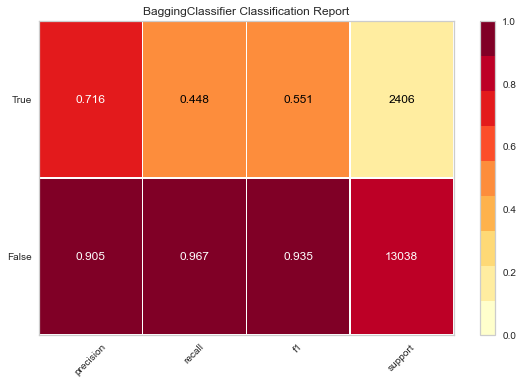

In [21]:
plot_model(tuned_lbgm_bagged, plot='class_report')

### Calibrate model

In [24]:
calibrated_tuned_lbgm_bagged = calibrate_model(tuned_lbgm_bagged)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8854,0.8699,0.4342,0.7198,0.5416,0.4807,0.5008
1,0.8846,0.8662,0.4466,0.7051,0.5468,0.4845,0.5011
2,0.8932,0.8785,0.4644,0.7565,0.5755,0.5184,0.5386
3,0.8865,0.8749,0.4385,0.7235,0.5461,0.4856,0.5055
4,0.8851,0.8658,0.4421,0.7106,0.5451,0.4834,0.5012
5,0.8951,0.8915,0.4724,0.7637,0.5837,0.5275,0.5474
6,0.8920,0.8785,0.4563,0.7529,0.5683,0.5108,0.5317
7,0.8909,0.8768,0.4510,0.7485,0.5628,0.5049,0.5261
8,0.8857,0.8673,0.4296,0.7237,0.5391,0.4787,0.4999
9,0.8890,0.8865,0.4652,0.7230,0.5662,0.5059,0.5221


## Prediction

In [25]:
# old data
pred_holdout = predict_model(tuned_lbgm_bagged)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8863,0.8758,0.4476,0.7161,0.5509,0.4897,0.5075


In [69]:
pred_holdout = predict_model(tuned_lbgm_bagged)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Bagging Classifier,0.8918,0.8779,0.4749,0.737,0.5776,0.5189,0.5354


In [70]:
tuned_lbgm_bagged_final = finalize_model(tuned_lbgm_bagged)

In [71]:
predictions = predict_model(tuned_lbgm_bagged_final, data=test_df)

## Save model

In [73]:
save_model(tuned_lbgm_bagged_final, 'tuned_lbgm_bagged_final_01Aug2020_newdata')

Transformation Pipeline and Model Succesfully Saved


## Submission

In [77]:
submission = predictions[['row_id','Label']].rename(columns={'Label':'open_flag'})

In [79]:
submission.to_csv('output/submission_2.csv',index=False)

# Pycaret - AutoML

In [80]:
env2 = setup(
    data = df, target='open_flag',
    categorical_features = ['country_code','attr_1','attr_2','domain'],
    numeric_features = ['subject_line_length',
            'open_count_last_10_days','open_count_last_30_days','open_count_last_60_days',
            'login_count_last_10_days','login_count_last_30_days','login_count_last_60_days',
            'checkout_count_last_10_days','checkout_count_last_30_days','checkout_count_last_60_days',
            'age','attr_3'
                       ],
    ignore_features = ['user_id','grass_date','row_id'],
    normalize = True,
    fix_imbalance = True,
    session_id = 0 #random seed
)

Setup Succesfully Completed!


,Description,Value
0,session_id,0
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(73539, 20)"
4,Missing Values,True
5,Numeric Features,14
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [81]:
# compare all baseline models and select top 5
top5 = compare_models(n_select=5, sort='MCC')

IntProgress(value=0, description='Processing: ', max=180)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:25:40
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
ETC,. . . . . . . . . . . . . . . . . .,Almost Finished


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8860,0.8756,0.5184,0.6748,0.5862,0.5214,0.5276,0.5944
1,Gradient Boosting Classifier,0.8642,0.8649,0.6323,0.5565,0.5919,0.5108,0.5124,11.2979
2,Extreme Gradient Boosting,0.8640,0.8641,0.6268,0.5564,0.5894,0.5083,0.5096,8.0566
3,Extra Trees Classifier,0.8719,0.8502,0.5423,0.5979,0.5687,0.4936,0.4945,1.9244
4,Ada Boost Classifier,0.8389,0.8550,0.6893,0.4886,0.5716,0.4760,0.4868,2.6158
5,Logistic Regression,0.8220,0.8562,0.7317,0.4557,0.5616,0.4574,0.4776,0.3321
6,Random Forest Classifier,0.8701,0.8347,0.4962,0.6009,0.5434,0.4686,0.4716,0.3268
7,SVM - Linear Kernel,0.8217,0.0000,0.7144,0.4557,0.5557,0.4512,0.4695,0.3347
8,Ridge Classifier,0.8184,0.0000,0.7021,0.4475,0.5465,0.4400,0.4575,0.0497
9,Linear Discriminant Analysis,0.8184,0.8488,0.7021,0.4475,0.5465,0.4400,0.4575,0.2439


ValueError: Mix of label input types (string and number)

In [ ]:
# tune top 5 base models
tuned_top5 = [tune_model(i) for i in top5]

In [ ]:
# ensemble top 5 tuned models
bagged_top5 = [ensemble_model(i) for i in tuned_top5]

In [ ]:
# blend top 5 base models 
blender = blend_models(estimator_list = top5) 

In [ ]:
# select best model 
best = automl(optimize = 'MCC')